# pandasのplotを用いたカテゴリカル値と連続値の可視化
kaggleとかでcsvファイルのデータ分析をする際に，keyごとの特徴量を可視化したい時とかに使う．

## Content

1. カテゴリカル値の可視化
2. 連続値の可視化
3. 2DataFrame 間のカテゴリカル値の比較
4. 2DataFrame 間の連続値の比較


## 必要なライブラリのimport

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(seed=0)

jupyter notebookなら以下も追加

In [3]:
%matplotlib inline

## DataFrameの準備

In [4]:
length=500
train_df = pd.DataFrame(np.random.normal(loc=0, scale=1, size=(length)),columns=["cont"])
eval_df = pd.DataFrame(np.random.normal(loc=1, scale=0.5, size=(length)),columns=["cont"])
train_df = train_df.assign(cat=np.random.randint(0,5,length)) 
eval_df = eval_df.assign(cat=np.random.randint(0,6,length)) 

## カテゴリカル値の可視化

In [5]:
def categorical_plot(df, key):
    data = df[key].value_counts(sort=False)
    ax = df[key].value_counts(sort=False).plot(kind="bar", title=key)
    for i, d in enumerate(data):
        ax.text(i, d, d, horizontalalignment="center",
                verticalalignment="bottom")
    return ax

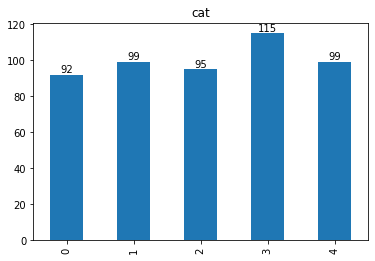

In [6]:
categorical_plot(train_df, "cat")

## 連続値の可視化

In [7]:
def continuous_plot(df, key):
    ax = df[key].plot(kind="density", title=key)
    return ax

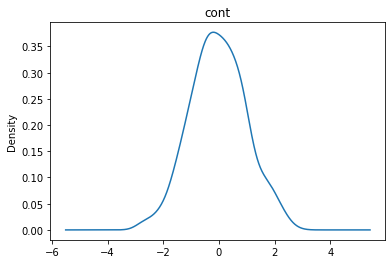

In [8]:
continuous_plot(train_df, "cont")

## 2DataFrame間のカテゴリカル値の比較

In [9]:
def compare_cat(trdf, evdf, key):
    tr_df = trdf.rename(columns={key: "train"})
    ev_df = evdf.rename(columns={key: "eval"})
    tr_df = tr_df["train"].value_counts(sort=False)
    ev_df = ev_df["eval"].value_counts(sort=False)
    plot_df = pd.concat([tr_df, ev_df], axis=1)
    ax = plot_df.plot(kind="bar", title=key)

    for i, d in enumerate(tr_df):
        ax.text(i, d, d, horizontalalignment="right",
                verticalalignment="bottom")
    for i, d in enumerate(ev_df):
        ax.text(i, d, d, horizontalalignment="left",
                verticalalignment="bottom")
    return ax

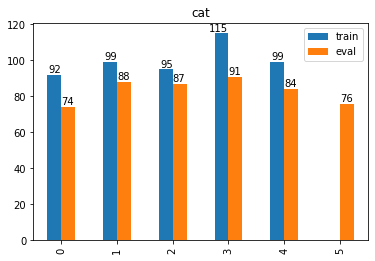

In [10]:
compare_cat(train_df, eval_df, "cat")

## 2DataFrame間の連続値の比較

In [11]:
def compare_cont(trdf, evdf, key):
    tr_df = trdf.rename(columns={key: "train"})["train"]
    ev_df = evdf.rename(columns={key: "eval"})["eval"]
    plot_df = pd.concat([tr_df, ev_df], axis=1)
    ax = plot_df.plot(kind="density", title=key).legend(loc="upper left")
    return ax

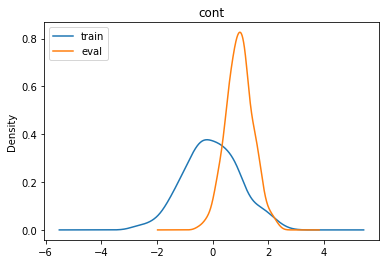

In [12]:
compare_cont(train_df, eval_df, "cont")